In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("D:\Data_Science\Kaggle_DS\penguins.csv")

In [2]:
# take a look at the data
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# display how many nulls in each column
penguins_df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [4]:
# display the shape of the data (how many rows and columns)
penguins_df.shape

(344, 5)

In [5]:
# display the percentage of nulls in the dataset
total_cells = np.product(penguins_df.shape)
missing_cells = penguins_df.isnull().sum().sum()
percntage_of_missing = missing_cells/total_cells
print(f'The percentage is: {percntage_of_missing*100}', '%')

The percentage is: 0.9883720930232558 %


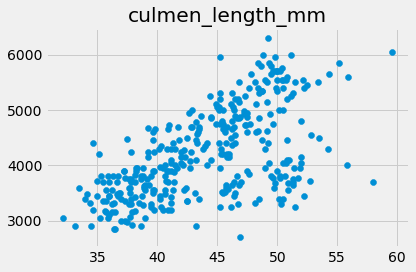

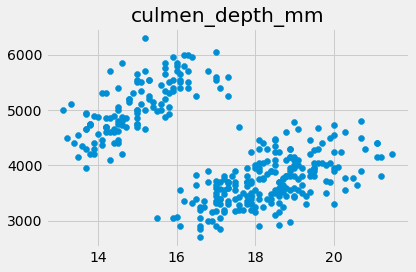

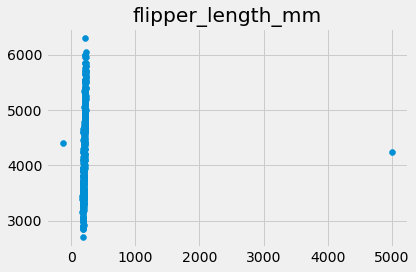

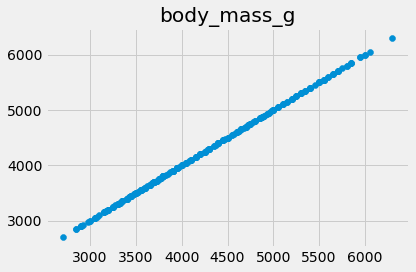

'\nimport plotly.express as px\n# create a scatter plot for each column\nfor column in column_names:\n    fig = px.scatter(penguins_df, x=column, y="body_mass_g")\n    fig.show()\n'

In [6]:
# ploting every column in the data set with respect to 'body_mass_g' column
# to take a look on the spread of the data
plt.style.use('fivethirtyeight')
column_names = list(penguins_df.columns[:-1])
for column in column_names:
   plt.scatter(x=penguins_df[column], y=penguins_df['body_mass_g'])
   plt.title(f'{column}')
   plt.tight_layout()
   plt.show()

'''
import plotly.express as px
# create a scatter plot for each column
for column in column_names:
    fig = px.scatter(penguins_df, x=column, y="body_mass_g")
    fig.show()
'''

In [7]:
# replace male with 1 and female with 0 to make this column numerical
# and replace the value '.' with MALE
penguins_df['sex'] = penguins_df['sex'].replace({'.':'MALE'})
penguins_df['sex'] = penguins_df['sex'].replace({'MALE':1, 'FEMALE':0})

In [8]:
# fill all missing values with whatever comes after it
penguins_df = penguins_df.fillna(method = 'bfill', axis = 0).fillna(0)

In [9]:
# no nulls left in the dataset
penguins_df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:

# Calculate the Q1, Q3, and IQR for all columns except the last one
q1 = np.percentile(penguins_df.iloc[:, :-1], 25, axis=0)
q3 = np.percentile(penguins_df.iloc[:, :-1], 75, axis=0)
iqr = q3 - q1

# Define the lower and upper bounds for each column
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Count the number of outliers in each column
outliers = np.sum((penguins_df.iloc[:, :-1] < lower_bound) | (penguins_df.iloc[:, :-1] > upper_bound), axis=0)

outliers

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    2
body_mass_g          0
dtype: int64

In [11]:
# remove the outliers from the data and save it in penguins_clean
outliers_mask = np.any((penguins_df.iloc[:, :-1] > upper_bound)
| (penguins_df.iloc[:, :-1] < lower_bound), axis = 1)
penguins_clean = penguins_df.drop(penguins_df[outliers_mask].index)
penguins_clean.shape

(342, 5)

In [12]:
# no outliers left
q1 = np.percentile(penguins_clean.iloc[:, :-1], 25, axis=0)
q3 = np.percentile(penguins_clean.iloc[:, :-1], 75, axis=0)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


outliers = np.sum((penguins_clean.iloc[:, :-1] < lower_bound) | (penguins_clean.iloc[:, :-1] > upper_bound), axis=0)

outliers

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [13]:
# standardize the data to emsure that every feature have a mean of '0' and a standard deviation of 1
scaler = StandardScaler()
scaled_df = scaler.fit_transform(penguins_clean)

In [14]:
# apply pca to the data to extract the best principle components
pca = PCA()
pca_df = pca.fit_transform(scaled_df)

In [15]:
explained_variance = pca.explained_variance_ratio_
cumsum = np.cumsum(explained_variance)
n_components = np.where(cumsum>0.1)[0][0]+1
n_components

1

In [16]:
# Using pca to reduce dimensions of the data to '2d' to simplify data while preserving as much of the valuable information as possible
pca = PCA(n_components = 2)
penguins_pca = pca.fit_transform(scaled_df)


In [17]:
# applying kmeans model with differnet number of clusters to select the best of them
K = range(2,5)
clusters = []
labels = []
inertias = []
kmeans = KMeans()
for k in K:
    kmeans = KMeans(n_clusters = k,random_state = 42)
    labels.append(kmeans.fit_predict(penguins_pca))
    clusters.append(kmeans.cluster_centers_)
    inertias.append(kmeans.inertia_)


In [18]:
inertias

[648.6826359393423, 344.19581604131105, 157.80164481618604]

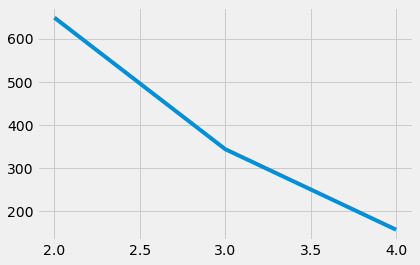

In [19]:
# plotting the elbow diagram to choose the best number of clusters
plt.plot(K,inertias)
plt.show()

In [20]:
# after knowing that 3 is the best number, we make a model with 3 clusters
best_model = KMeans(n_clusters=3, random_state = 42)
best_labels = best_model.fit_predict(penguins_pca)

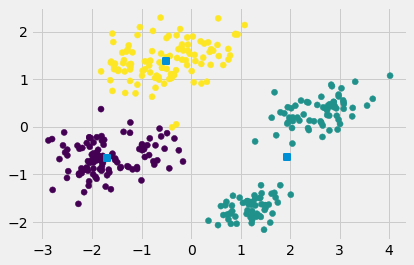

In [21]:
# plotting the data after applying the model
plt.scatter(penguins_pca[:,0], penguins_pca[:,1], c = best_labels)
plt.scatter(best_model.cluster_centers_[:,0],best_model.cluster_centers_[:,1],marker='s',linewidth=2)
plt.show()

In [22]:
best_model.cluster_centers_

array([[-1.69190475, -0.65627884],
       [ 1.92626179, -0.64016459],
       [-0.49943894,  1.38453948]])

In [23]:
penguins_clean['label'] = best_labels

In [24]:
# calculating the accuracy of the model, note that: they may not reflect the true value
from sklearn.metrics import silhouette_score
accuracy = silhouette_score(penguins_pca, best_labels)
print(f'The accuracy is: {accuracy*100}','%')

The accuracy is: 57.075038416776955 %
